![../docs/images/banner-small.png](../docs/images/banner-small.png)

In [4]:
%matplotlib widget
# import sys
# sys.path.append('../')
from IPython.display import clear_output
from invertedai import Jupyter_Render
import numpy as np
import cv2
import invertedai as iai
clear_output()

Jupyter_Render(children=(HBox(children=(Play(value=0, description='Press play', max=0), IntSlider(value=0, des…

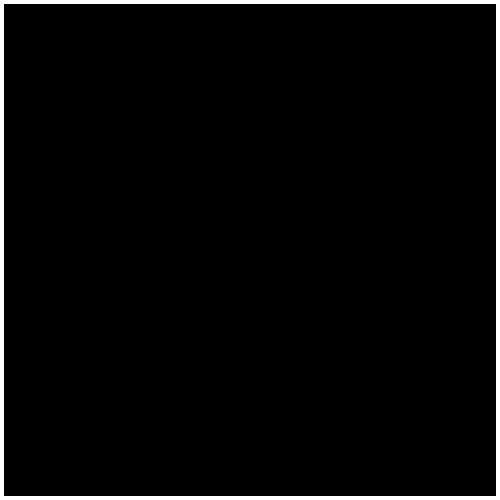

In [5]:
location="CARLA:Town03:Roundabout"
simulation_length = 30
renderer = Jupyter_Render()
display(renderer)

In [7]:
response = iai.initialize(
    location=location,
    agent_count=10,
    batch_size=1,
    min_speed=10,
    max_speed=20,
)
agent_attributes = response["attributes"]
frames = []
for t in range(simulation_length):
    response = iai.drive(
        agent_attributes=agent_attributes,
        states=response["states"],
        recurrent_states=response["recurrent_states"],
        return_birdviews=True,
        location=location,
        obs_length=1,
        step_times=1,
    )
    birdview = cv2.imdecode(np.array(response["bird_view"], dtype=np.uint8), cv2.IMREAD_COLOR)
    renderer.add_frame(birdview)